In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Here we are just importing the dataset

In [4]:
df = pd.read_csv('sales_data_fitness.csv')
df.head()



,Channel,Country,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
0,Direct,United States,Existing,18-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
1,Unattributed,United States,Existing,01-04-2021,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
3,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
4,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0


In [5]:
df1 = pd.read_csv('sales_data_fitness.csv',parse_dates=['Date'],index_col=['Date'])
df1

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '24-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-04-2021' in DD/MM/YYYY format. Provide format or specif

,Channel,Country,Customertype,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
Date,,,,,,,,,,,,,,,
2021-04-18,Direct,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
2021-01-04,Unattributed,United States,Existing,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
2021-04-24,Unattributed,United States,Existing,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,Unattributed,United States,Existing,2022-04,2022-2,2022-13,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Florida,US,2,75
2022-11-04,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,39
2022-04-14,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,42


## Time Series Analysis - Resampling data at monthly level 

In [6]:
df2 = df1.resample('M').sum()
df2

,Dateyear,Qty,Revenue
Date,,,
2015-12-31,14105,7,213
2016-01-31,749952,445,12657
2016-02-29,806400,468,13085
2016-03-31,1032192,619,18183
2016-04-30,1139040,723,19936
...,...,...,...
2022-08-31,102343530,96297,3423204
2022-09-30,85920846,66554,2411940
2022-10-31,93470994,70021,2524096


## The below part just shows us the number of columns and every column name 
## We have a total number of 16 columns

In [7]:
df.columns


Index(['Channel', 'Country', 'Customertype', 'Date', 'Datemonth',
       'Datequarter', 'Dateweek', 'Dateyear', 'Ordertype', 'Product',
       'Product Group', 'Sales Channel', 'State', 'System', 'Qty', 'Revenue'],
      dtype='object')

In [8]:
len(df.columns)

16

## Return number of rows and columns


In [9]:
df.shape

(1442105, 16)

## Here we are just trying to describe the data - Understand the statistics of given data.

## For numeric values, describe would provide values such as mean, min, max, std. deviation.

In [10]:
df.describe() 


,Dateyear,Qty,Revenue
count,1.442105e+06,1.442105e+06,1.442105e+06
mean,2.020766e+03,1.686620e+00,5.518429e+01
std,1.247838e+00,3.479692e+00,7.964015e+01
min,2.015000e+03,1.000000e+00,-4.000000e+00
25%,2.020000e+03,1.000000e+00,3.300000e+01
50%,2.021000e+03,1.000000e+00,3.900000e+01
75%,2.022000e+03,2.000000e+00,6.000000e+01
max,2.022000e+03,1.044000e+03,1.334400e+04


## This gives us an analytical summary of the dataset

In [11]:
df.describe(include='all') 


,Channel,Country,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
count,1442105,1438746,1442105,1442105,1442105,1442105,1442105,1.442105e+06,1442105,1437212,1437212,1442105,1438235,1442105,1.442105e+06,1.442105e+06
unique,13,50,2,2506,84,29,360,NaN,2,46,44,14,175,1,NaN,NaN
top,Unattributed,United States,Existing,12-11-2021,2022-08,2022-2,2021-44,NaN,One_Time,Whey Protein Powder,Whey Protein Powder,Online Store,Texas,US,NaN,NaN
freq,375951,1404103,981456,11613,55117,144227,20806,NaN,1301106,193424,193424,1105341,119995,1442105,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020766e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.686620e+00,5.518429e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.247838e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.479692e+00,7.964015e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.015000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-4.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.300000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.021000e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,3.900000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,6.000000e+01


## Summary of distribution for relevant variables

array([[<AxesSubplot:title={'center':'Dateyear'}>,
        <AxesSubplot:title={'center':'Qty'}>],
       [<AxesSubplot:title={'center':'Revenue'}>, <AxesSubplot:>]],
      dtype=object)

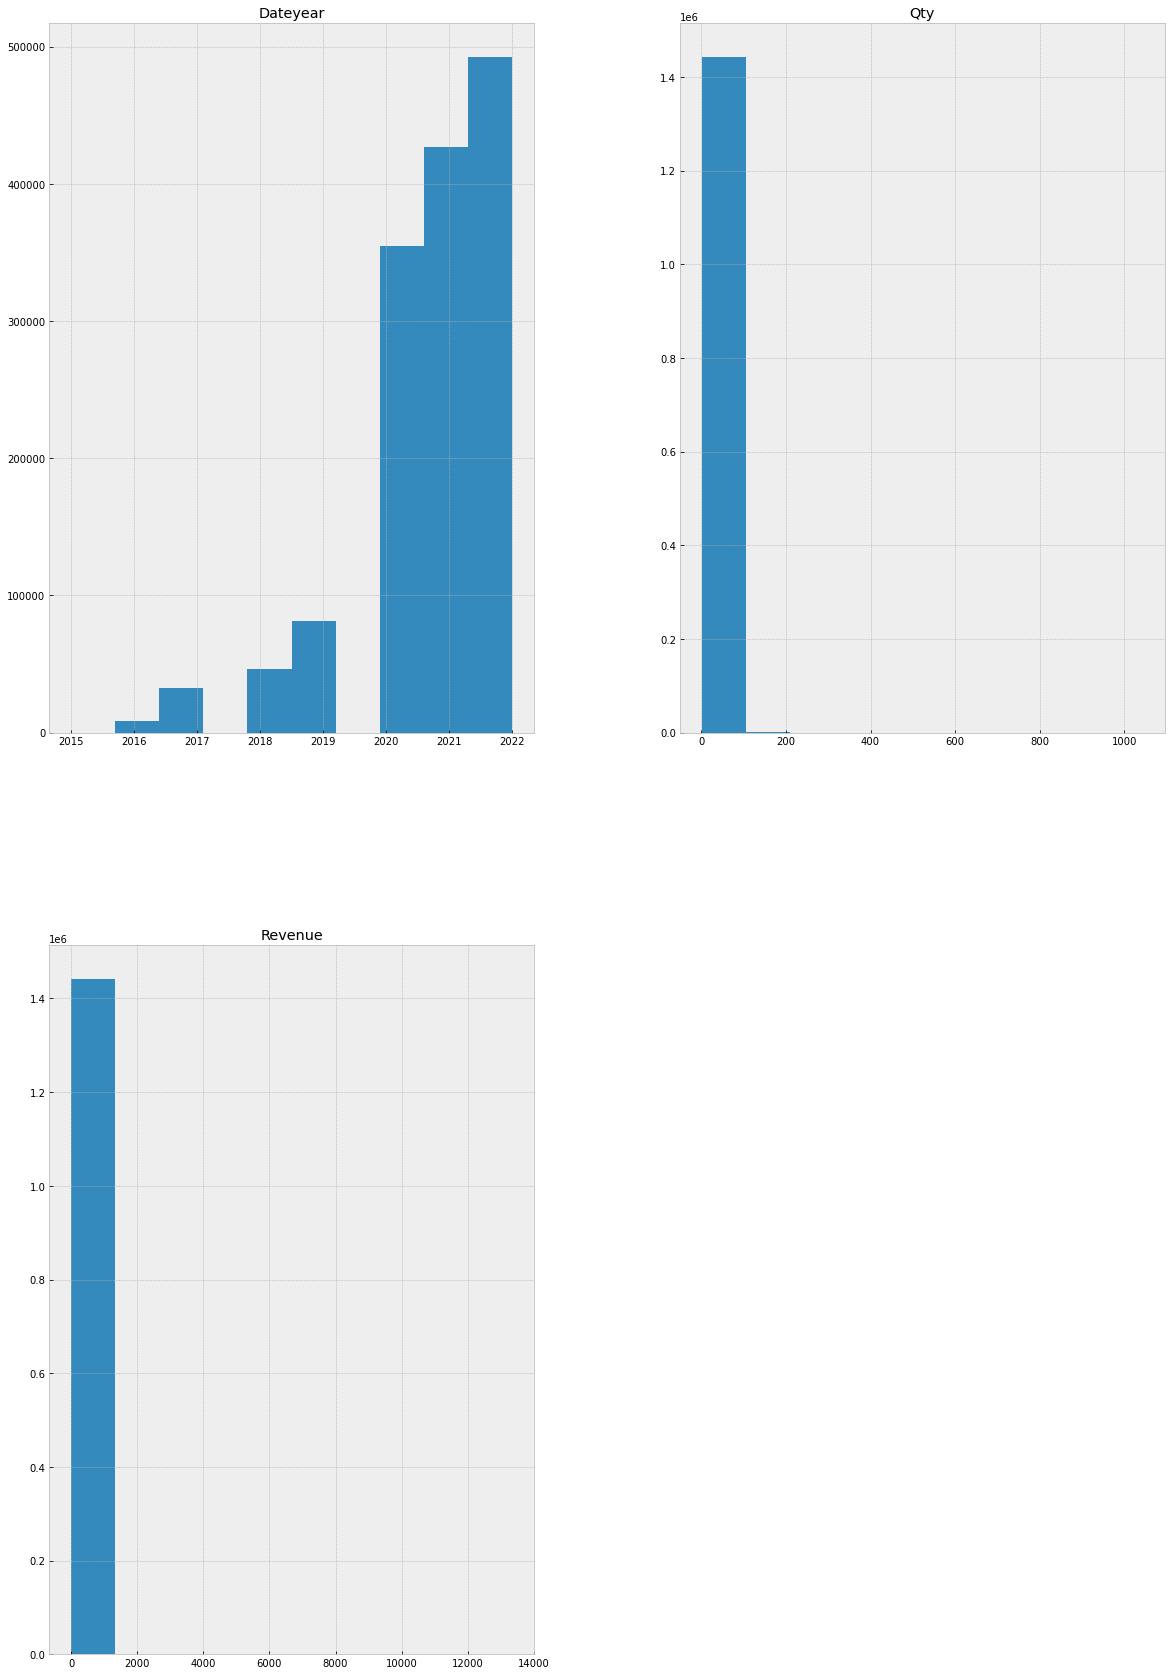

In [12]:
df.hist(figsize=(20,30)) 


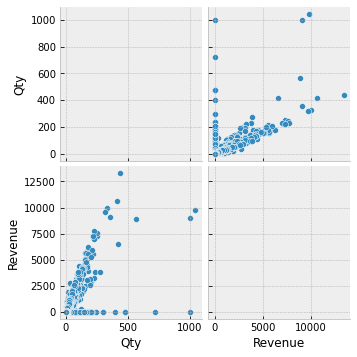

In [13]:
sns.pairplot(df[['Qty','Revenue']])


## Extract single row from dataframe

In [14]:
df.values[0]

array(['Direct', 'United States', 'Existing', '18-04-2021', '2021-04',
       '2021-2', '2021-15', 2021, 'One_Time', 'Endopump / Pump Enhancer',
       'Endopump', 'Draft Orders', 'California', 'US', 12, 258],
      dtype=object)

In [15]:
df.values[100]

array(['Unattributed', 'United States', 'Existing', '12-04-2021',
       '2021-04', '2021-2', '2021-14', 2021, 'One_Time',
       'Supplement Samples', 'Supplement Samples', 'Draft Orders',
       'North Carolina', 'US', 1, 0], dtype=object)

## Extract specific cell

In [16]:
df.values[100,1]

'United States'

In [17]:
df.values[100,5]

'2021-2'

Here we are converting the Date datatype from object to datetimeindex

In [18]:
df["Date"] = pd.to_datetime(df["Date"])


C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-04-2021' in DD/MM/YYYY format. Provide format or specif

## Checking for nulls and default data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442105 entries, 0 to 1442104
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Channel        1442105 non-null  object        
 1   Country        1438746 non-null  object        
 2   Customertype   1442105 non-null  object        
 3   Date           1442105 non-null  datetime64[ns]
 4   Datemonth      1442105 non-null  object        
 5   Datequarter    1442105 non-null  object        
 6   Dateweek       1442105 non-null  object        
 7   Dateyear       1442105 non-null  int64         
 8   Ordertype      1442105 non-null  object        
 9   Product        1437212 non-null  object        
 10  Product Group  1437212 non-null  object        
 11  Sales Channel  1442105 non-null  object        
 12  State          1438235 non-null  object        
 13  System         1442105 non-null  object        
 14  Qty            1442105 non-null  i

## Check the number of nulls


In [20]:
df.isnull().sum()

Channel             0
Country          3359
Customertype        0
Date                0
Datemonth           0
Datequarter         0
Dateweek            0
Dateyear            0
Ordertype           0
Product          4893
Product Group    4893
Sales Channel       0
State            3870
System              0
Qty                 0
Revenue             0
dtype: int64

In [21]:
# dataframe.size
size = df.size
size

23073680

## Display number of rows/columns

In [22]:
# dataframe.shape
shape = df.shape
shape
  


(1442105, 16)

In [23]:
# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))

Size = 23073680
Shape =(1442105, 16)
Shape[0] x Shape[1] = 23073680


## Display all the Datatypes

In [24]:
#Datatypes

df.dtypes

Channel                  object
Country                  object
Customertype             object
Date             datetime64[ns]
Datemonth                object
Datequarter              object
Dateweek                 object
Dateyear                  int64
Ordertype                object
Product                  object
Product Group            object
Sales Channel            object
State                    object
System                   object
Qty                       int64
Revenue                   int64
dtype: object

Data Elements that are Correlated 

In [25]:
df.corr()

,Dateyear,Qty,Revenue
Dateyear,1.000000,-0.007966,0.019973
Qty,-0.007966,1.000000,0.753345
Revenue,0.019973,0.753345,1.000000


<AxesSubplot:>

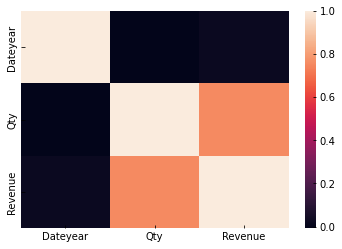

In [26]:
#Correlation plot

sns.heatmap(df.corr())

A histogram of the variable Revenue

array([[<AxesSubplot:title={'center':'Revenue'}>]], dtype=object)

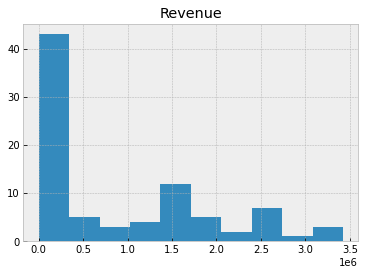

In [27]:
fig = df2.hist('Revenue')
fig

In [28]:
# Let's calculate the percentage of each Channel category.
df.Channel.value_counts(normalize=True)



Unattributed      0.260696
Direct            0.194066
Paid Search       0.184687
Organic Search    0.174335
Recharge          0.057358
Referral          0.047173
Email             0.040105
Organic Social    0.025871
Other             0.009896
Display           0.003801
Paid Social       0.001704
Video             0.000268
SMS               0.000040
Name: Channel, dtype: float64

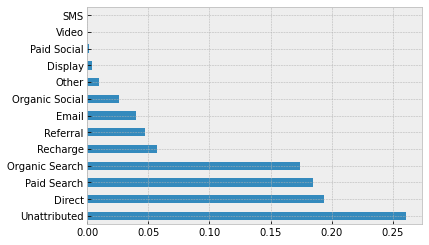

In [29]:
#plot the bar graph of percentage channel categories
df.Channel.value_counts(normalize=True).plot.barh()
plt.show()

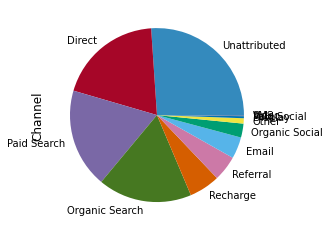

In [30]:
#plot the pie graph of percentage channel categories
df.Channel.value_counts(normalize=True).plot.pie()
plt.show()

In [31]:
# Let's calculate the percentage of each State category.
df.State.value_counts(normalize=True)

Texas               8.343212e-02
California          7.433139e-02
Florida             4.921379e-02
New York            4.099121e-02
Virginia            3.696614e-02
                        ...     
Lecco               6.952967e-07
Verona              6.952967e-07
Sutton Coldfield    6.952967e-07
Trento              6.952967e-07
Nuevo León          6.952967e-07
Name: State, Length: 175, dtype: float64

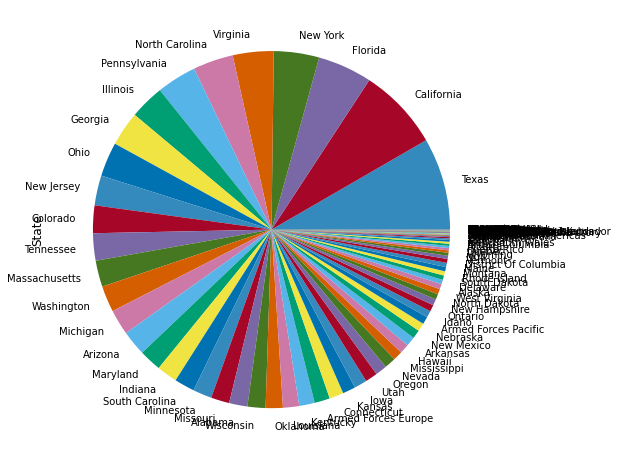

In [32]:
#calculate the percentage of each state category.
df.State.value_counts(normalize=True)

#plot the pie chart of State categories
df.State.value_counts(normalize=True).plot.pie(figsize=(8, 10))
plt.show()

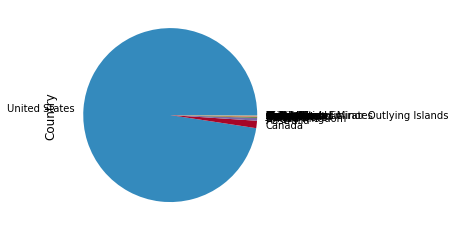

In [33]:
#calculate the percentage of each Country category.
df.Country.value_counts(normalize=True)

#plot the pie chart of education categories
df.Country.value_counts(normalize=True).plot.pie()
plt.show()

In [34]:
# Let's calculate the percentage of each Product category.
df.Product.value_counts(normalize=True)

Whey Protein Powder                          1.345828e-01
Strong Greens / Superfood Powerhouse         1.328009e-01
Flight / Pre Workout                         1.059614e-01
Strong Reds / Superfood Powerhouse           9.624746e-02
Creatine Monohydrate / Creapure®             7.579953e-02
Accessories                                  6.645227e-02
Endopump / Pump Enhancer                     5.796153e-02
Intra Flight / Branched-Chain Amino Acids    4.571838e-02
Strong Joints / Joint Support                4.267081e-02
G.1.M Sport / Endurance & Electrolytes       3.911531e-02
In Focus / Cognitive Enhancer                3.712118e-02
Strong Multi-Vitamin                         3.571150e-02
Vegan Protein Powder                         2.220619e-02
Electrolytes / Hydration Drink Mix           1.907095e-02
Field Bar / Whey Protein Nutrition Bar       1.485098e-02
Bare Burn / Fat Burner                       1.410926e-02
Supplement Samples                           1.295146e-02
Collagen Prote

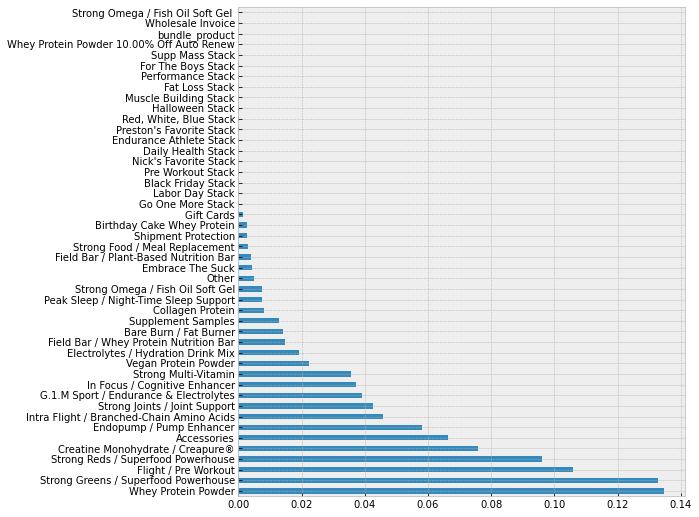

In [35]:
#plot the bar graph of percentage Product categories
df.Product.value_counts(normalize=True).plot.barh(figsize=(8, 9))
plt.show()

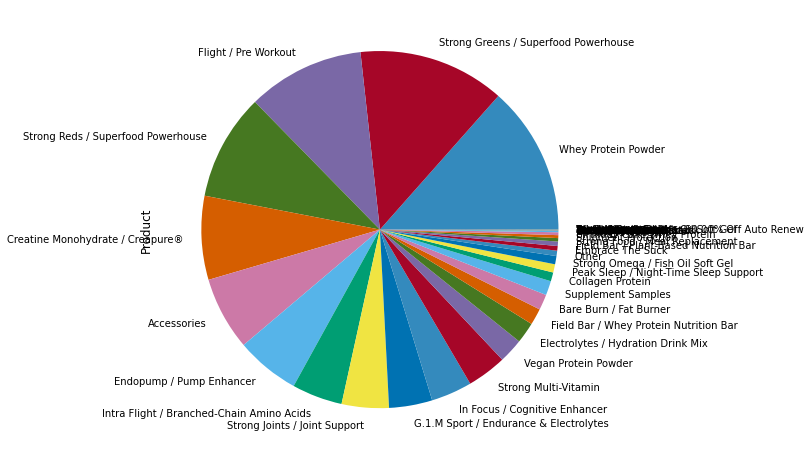

In [36]:
#plot the pie graph of percentage Product categories
df.Product.value_counts(normalize=True).plot.pie(figsize=(8, 9))
plt.show()

In [37]:
df.Revenue.describe()


count    1.442105e+06
mean     5.518429e+01
std      7.964015e+01
min     -4.000000e+00
25%      3.300000e+01
50%      3.900000e+01
75%      6.000000e+01
max      1.334400e+04
Name: Revenue, dtype: float64

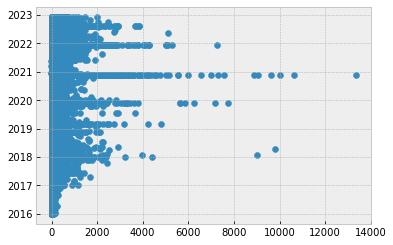

In [38]:
#plotting the scatter plot of Revenue and Dateyear variable in data
plt.scatter(df.Revenue,df.Date)
plt.show()



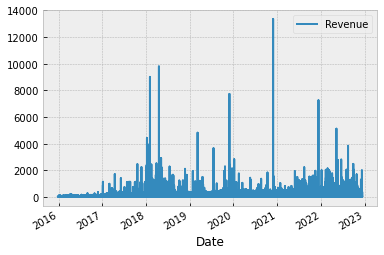

In [39]:
df.plot(x="Date", y="Revenue", kind="line")
plt.show()

Month wise plot of the Revenue

<AxesSubplot:xlabel='Date'>

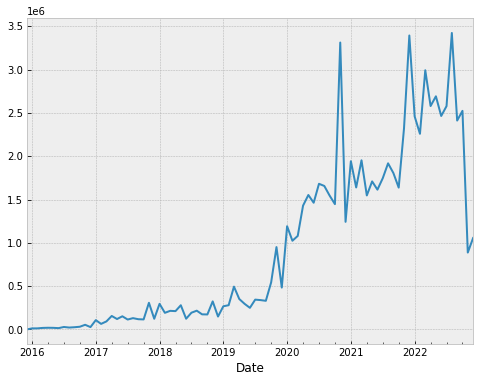

In [40]:
df2['Revenue'].plot(figsize=(8, 6))

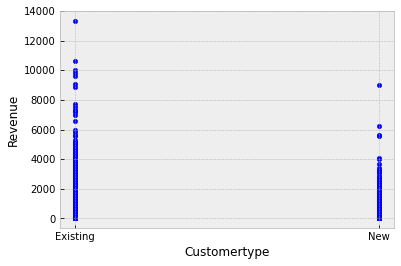

In [41]:
#plotting the scatter plot of Customertype1 and Revenue variable in data
df.plot.scatter(x="Customertype",y="Revenue")
plt.show()

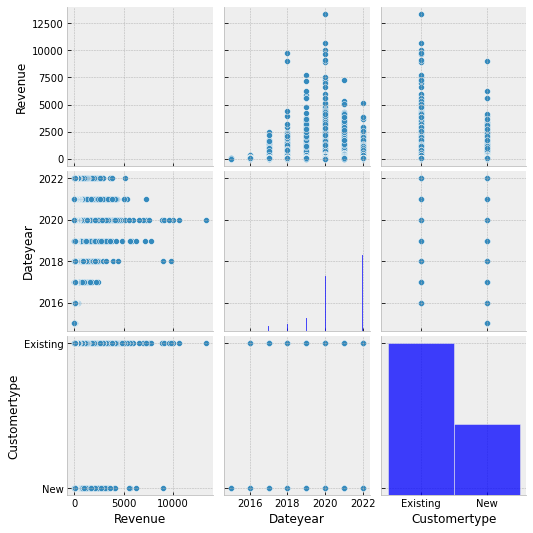

In [42]:
sns.pairplot(data = df, vars=['Revenue','Dateyear','Customertype'])
plt.show()

In [43]:
df.groupby('Channel')['Revenue'].mean()


Channel
Direct            54.209119
Display           40.702791
Email             59.263439
Organic Search    60.056545
Organic Social    45.074593
Other             51.321982
Paid Search       60.168583
Paid Social       46.518519
Recharge          62.765039
Referral          46.360567
SMS               51.258621
Unattributed      49.854143
Video             41.863049
Name: Revenue, dtype: float64

In [76]:
df.groupby('Product')['Revenue'].median().sort_values()


Product
Other                                          0.0
Whey Protein Powder 10.00% Off Auto Renew      0.0
Strong Omega / Fish Oil Soft Gel               0.0
Shipment Protection                            3.0
Supplement Samples                             8.0
Creatine Monohydrate / Creapure®              28.0
Accessories                                   30.0
Strong Joints / Joint Support                 30.0
Strong Multi-Vitamin                          30.0
Field Bar / Plant-Based Nutrition Bar         30.0
Field Bar / Whey Protein Nutrition Bar        31.0
Intra Flight / Branched-Chain Amino Acids     35.0
Endopump / Pump Enhancer                      35.0
In Focus / Cognitive Enhancer                 39.0
Flight / Pre Workout                          39.0
Strong Omega / Fish Oil Soft Gel              40.0
G.1.M Sport / Endurance & Electrolytes        40.0
Strong Reds / Superfood Powerhouse            40.0
Embrace The Suck                              40.0
Electrolytes / Hydratio

In [77]:
df.groupby('State')['Revenue'].mean().sort_values()


State
Zh                  0.000000
Quartier Royal      0.000000
Santarém            0.000000
Hokkaidō            0.000000
Solihull            0.000000
                     ...    
Texas              81.335389
Tauranga           90.500000
Pavia             102.000000
Roma              138.000000
West Yorkshire    355.215385
Name: Revenue, Length: 176, dtype: float64

## Identify unique publishers in the dataset

In [46]:
df.Country.unique()

array(['United States', nan, 'Canada', 'Australia', 'Luxembourg',
       'United Kingdom', 'China', 'Singapore', 'Sweden', 'South Africa',
       'Hong Kong', 'Us', 'Ca', 'Gb', 'Denmark', 'Germany', 'Ireland',
       'Taiwan', 'Japan', 'Italy', 'New Zealand', 'Switzerland',
       'Netherlands', 'France', 'United Arab Emirates', 'Norway', 'Au',
       'Egypt', 'Afghanistan', 'India', 'Cn', 'Poland', 'Portugal',
       'Belgium', 'Romania', 'Bermuda', 'Finland', 'Austria',
       'South Korea', 'Iraq', 'Israel', 'Jordan',
       'United States Minor Outlying Islands', 'Slovenia', 'Greece',
       'Zimbabwe', 'Czech Republic', 'Null', 'Hungary', 'Mexico',
       'Turkey'], dtype=object)

In [47]:
df.Country.unique().size

51

In [48]:
df.Country.value_counts()

United States                           1404103
Canada                                    19674
Australia                                  7545
United Kingdom                             2050
Singapore                                  1705
New Zealand                                 899
Ireland                                     450
Us                                          425
Hong Kong                                   363
Switzerland                                 280
Netherlands                                 269
Sweden                                      207
France                                      176
South Africa                                128
Taiwan                                       90
China                                        48
Norway                                       45
Denmark                                      39
Luxembourg                                   29
Germany                                      28
United Arab Emirates                    

## Show top 10

In [49]:
df.Country.value_counts().head(10)

United States     1404103
Canada              19674
Australia            7545
United Kingdom       2050
Singapore            1705
New Zealand           899
Ireland               450
Us                    425
Hong Kong             363
Switzerland           280
Name: Country, dtype: int64

In [50]:
df.Country.value_counts(ascending = True) 

Turkey                                        1
Bermuda                                       1
Cn                                            1
Greece                                        1
Zimbabwe                                      1
Mexico                                        1
Hungary                                       1
Slovenia                                      2
United States Minor Outlying Islands          2
Iraq                                          2
Null                                          2
Ca                                            3
Jordan                                        3
Austria                                       3
India                                         4
Israel                                        4
Czech Republic                                4
Afghanistan                                   5
Romania                                       5
Poland                                        6
Finland                                 

In [51]:
df.State.value_counts().head(10)

Texas             119995
California        106906
Florida            70781
New York           58955
Virginia           53166
North Carolina     52445
Pennsylvania       51871
Illinois           45244
Georgia            44910
Ohio               44583
Name: State, dtype: int64

In [52]:
feature_names=list(df.columns)
pd.DataFrame([[f, df[f].dtype, df[f].nunique()] for f in feature_names], 
              columns=['feature', 'type', 'distinct values'])

,feature,type,distinct values
0,Channel,object,13
1,Country,object,50
2,Customertype,object,2
3,Date,datetime64[ns],2506
4,Datemonth,object,84
5,Datequarter,object,29
6,Dateweek,object,360
7,Dateyear,int64,8
8,Ordertype,object,2
9,Product,object,46


As you can see we have taken the time series data and in this type of data **we don't have any data imbalance**
Time Series Data - A time series is a sequence of data points that occur in successive order over some period of time. This can be contrasted with cross-sectional data, which captures a point in time.

### To be Continued..........

### Data Cleaning

In [53]:
df = pd.read_csv('sales_data_fitness.csv')
df.head()

,Channel,Country,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
0,Direct,United States,Existing,18-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
1,Unattributed,United States,Existing,01-04-2021,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
3,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
4,Unattributed,United States,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0


## Checking for nulls

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442105 entries, 0 to 1442104
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Channel        1442105 non-null  object
 1   Country        1438746 non-null  object
 2   Customertype   1442105 non-null  object
 3   Date           1442105 non-null  object
 4   Datemonth      1442105 non-null  object
 5   Datequarter    1442105 non-null  object
 6   Dateweek       1442105 non-null  object
 7   Dateyear       1442105 non-null  int64 
 8   Ordertype      1442105 non-null  object
 9   Product        1437212 non-null  object
 10  Product Group  1437212 non-null  object
 11  Sales Channel  1442105 non-null  object
 12  State          1438235 non-null  object
 13  System         1442105 non-null  object
 14  Qty            1442105 non-null  int64 
 15  Revenue        1442105 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 176.0+ MB


## Check the number of nulls


In [55]:
df.isnull().sum()

Channel             0
Country          3359
Customertype        0
Date                0
Datemonth           0
Datequarter         0
Dateweek            0
Dateyear            0
Ordertype           0
Product          4893
Product Group    4893
Sales Channel       0
State            3870
System              0
Qty                 0
Revenue             0
dtype: int64

In [56]:
df.fillna(0,inplace=True)

In [57]:
df.isnull().sum()

Channel          0
Country          0
Customertype     0
Date             0
Datemonth        0
Datequarter      0
Dateweek         0
Dateyear         0
Ordertype        0
Product          0
Product Group    0
Sales Channel    0
State            0
System           0
Qty              0
Revenue          0
dtype: int64

# Drop columns

In [58]:
df = df.drop('Country',axis=1)

In [59]:
df

,Channel,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
0,Direct,Existing,18-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,US,12,258
1,Unattributed,Existing,01-04-2021,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,US,1,0
2,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,US,2,0
3,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,US,2,0
4,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,US,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442100,Unattributed,Existing,03-04-2022,2022-04,2022-2,2022-13,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Florida,US,2,75
1442101,Unattributed,Existing,11-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,39
1442102,Unattributed,Existing,14-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,42
1442103,Unattributed,Existing,11-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Colorado,US,1,36


In [60]:
df.columns

Index(['Channel', 'Customertype', 'Date', 'Datemonth', 'Datequarter',
       'Dateweek', 'Dateyear', 'Ordertype', 'Product', 'Product Group',
       'Sales Channel', 'State', 'System', 'Qty', 'Revenue'],
      dtype='object')

In [61]:
df = df.drop('System',axis=1)

In [62]:
df

,Channel,Customertype,Date,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,Qty,Revenue
0,Direct,Existing,18-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Endopump / Pump Enhancer,Endopump,Draft Orders,California,12,258
1,Unattributed,Existing,01-04-2021,2021-04,2021-2,2021-12,2021,One_Time,Accessories,Accessories,Draft Orders,California,1,0
2,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Pennsylvania,2,0
3,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Texas,2,0
4,Unattributed,Existing,24-04-2021,2021-04,2021-2,2021-15,2021,One_Time,Accessories,Accessories,Draft Orders,Washington,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442100,Unattributed,Existing,03-04-2022,2022-04,2022-2,2022-13,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Florida,2,75
1442101,Unattributed,Existing,11-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,1,39
1442102,Unattributed,Existing,14-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,1,42
1442103,Unattributed,Existing,11-04-2022,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Colorado,1,36


In [63]:
df.columns

Index(['Channel', 'Customertype', 'Date', 'Datemonth', 'Datequarter',
       'Dateweek', 'Dateyear', 'Ordertype', 'Product', 'Product Group',
       'Sales Channel', 'State', 'Qty', 'Revenue'],
      dtype='object')

In [64]:
df.shape

(1442105, 14)

# Analysis

In [65]:
df[['State','Revenue']].groupby(by="State").sum().sort_values('Revenue',ascending=False).head(20)

,Revenue
State,
Texas,9759840
California,7988244
Florida,4376813
New York,3435157
Pennsylvania,3006616
Virginia,2945060
North Carolina,2908830
Illinois,2484093
Ohio,2446634


In [66]:
df2 = df1.resample('W').sum()
df2

,Dateyear,Qty,Revenue
Date,,,
2015-12-27,6045,3,114
2016-01-03,24188,13,383
2016-01-10,376992,234,6948
2016-01-17,268128,147,3682
2016-01-24,48384,26,820
...,...,...,...
2022-11-13,15448080,11632,424543
2022-11-20,0,0,0
2022-11-27,0,0,0


In [67]:
from datetime import datetime

<AxesSubplot:xlabel='Date'>

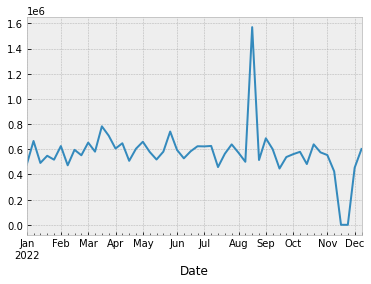

In [68]:
df2[datetime(2022,1,1)<= df2.index ]['Revenue'].plot()

In [69]:
!pip install plotnine

In [70]:
import seaborn as sns

In [71]:
# sns.lineplot(x="Date",y = "Revenue",data=df,hue="Customertype")

In [72]:
df3 = df1[datetime(2022,1,1)<= df1.index ]

In [73]:
df3

,Channel,Country,Customertype,Datemonth,Datequarter,Dateweek,Dateyear,Ordertype,Product,Product Group,Sales Channel,State,System,Qty,Revenue
Date,,,,,,,,,,,,,,,
2022-04-15,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,One_Time,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Codisto,California,US,1,45
2022-04-23,Unattributed,United States,Existing,2022-04,2022-2,2022-15,2022,One_Time,Peak Sleep / Night-Time Sleep Support,Peak Sleep,Codisto,California,US,1,50
2022-05-22,Unattributed,United States,Existing,2022-05,2022-2,2022-20,2022,One_Time,Electrolytes / Hydration Drink Mix,Electrolytes,Codisto,Utah,US,1,49
2022-05-30,Unattributed,United States,Existing,2022-05,2022-2,2022-21,2022,One_Time,Field Bar / Whey Protein Nutrition Bar,Field Bar,Codisto,Texas,US,1,35
2022-05-13,Unattributed,United States,Existing,2022-05,2022-2,2022-18,2022,One_Time,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Codisto,Georgia,US,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,Unattributed,United States,Existing,2022-04,2022-2,2022-13,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,Florida,US,2,75
2022-11-04,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,39
2022-04-14,Unattributed,United States,Existing,2022-04,2022-2,2022-14,2022,Subscription,G.1.M Sport / Endurance & Electrolytes,G.1.M Sport,Recharge Subscriptions,California,US,1,42


In [ ]:
sns.lineplot(x="Date",y = "Revenue",data=df3,hue="Customertype")

In [ ]:
sns.lineplot(x="Date",y = "Revenue",data=df3,hue="Ordertype")